BOSTON HOUSE PRICE PREDICTION

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [184]:
df = pd.read_csv(r"C:\Users\abu\Documents\House Price Prediction\BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


EXPLORATORY DATA ANALYIS

In [185]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [186]:
df.shape

(506, 14)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [188]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [189]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


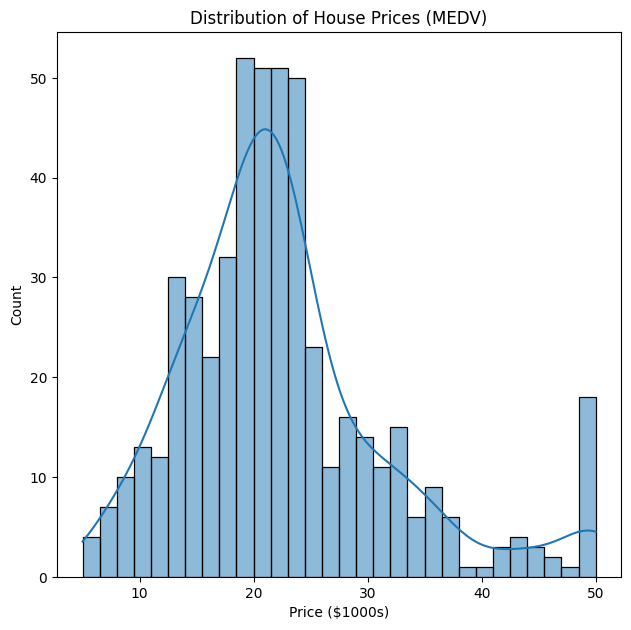

In [190]:
# Distribution of target variable (medv)
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.histplot(df['medv'], bins=30, kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Price ($1000s)')
plt.tight_layout()
plt.show()



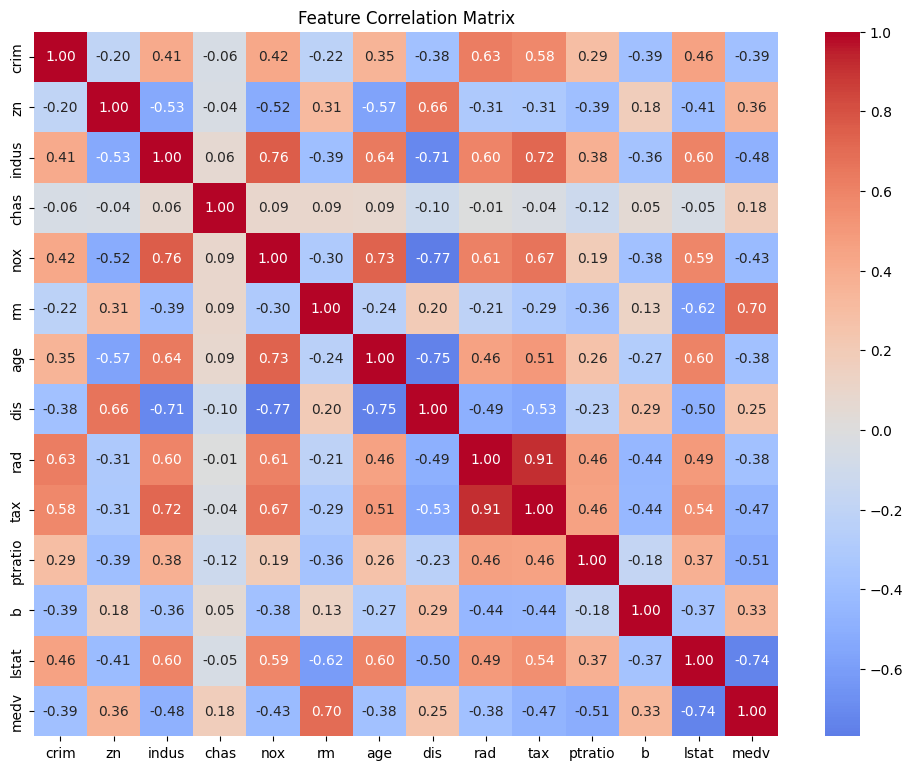

In [191]:
# Correlation matrix
plt.figure(figsize=(29, 15))
plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

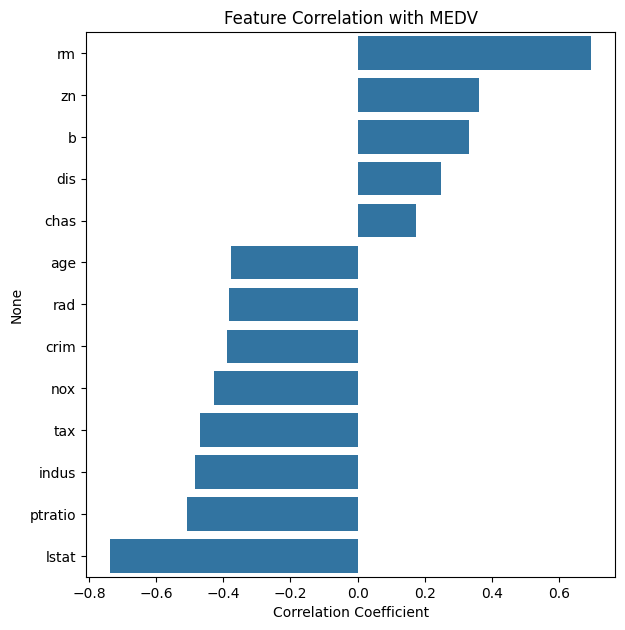

In [192]:
# 3. Top correlated features with medv
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 3)
price_corr = df.corr()['medv'].sort_values(ascending=False)[1:]
sns.barplot(x=price_corr.values, y=price_corr.index)
plt.title('Feature Correlation with MEDV')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

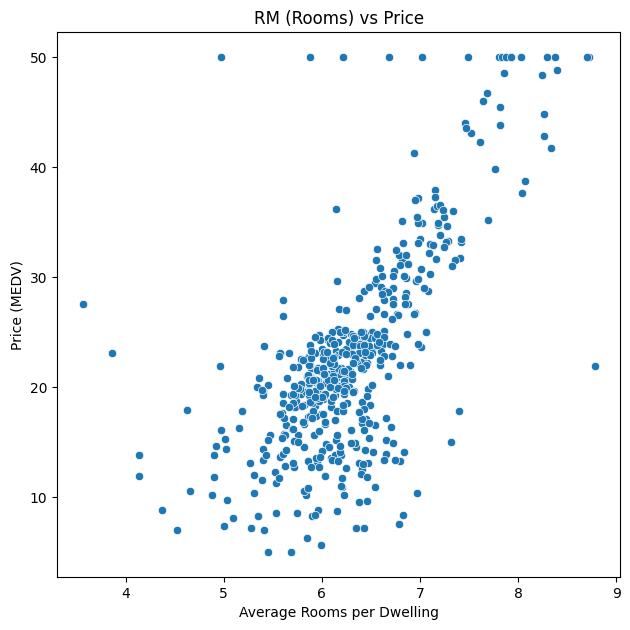

In [193]:
# RM vs MEDV (most correlated feature)
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 4)
sns.scatterplot(x=df['rm'], y=df['medv'])
plt.title('RM (Rooms) vs Price')
plt.xlabel('Average Rooms per Dwelling')
plt.ylabel('Price (MEDV)')
plt.tight_layout()
plt.show()

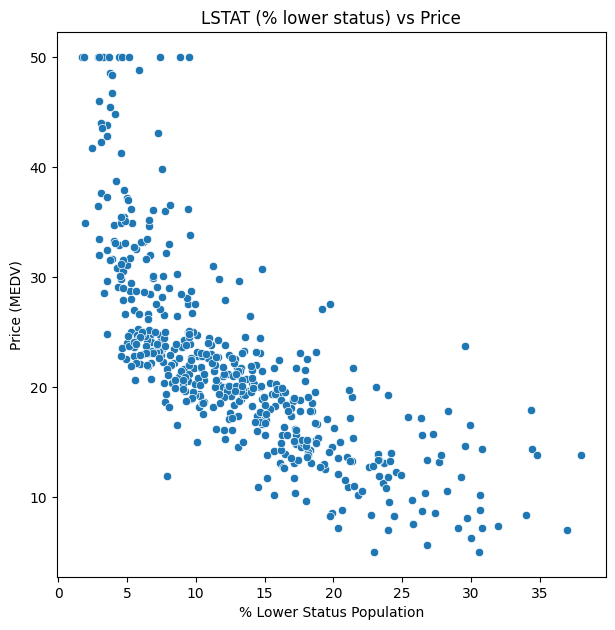

In [194]:
# LSTAT vs MEDV (negative correlation)
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 5)
sns.scatterplot(x=df['lstat'], y=df['medv'])
plt.title('LSTAT (% lower status) vs Price')
plt.xlabel('% Lower Status Population')
plt.ylabel('Price (MEDV)')
plt.tight_layout()
plt.show()


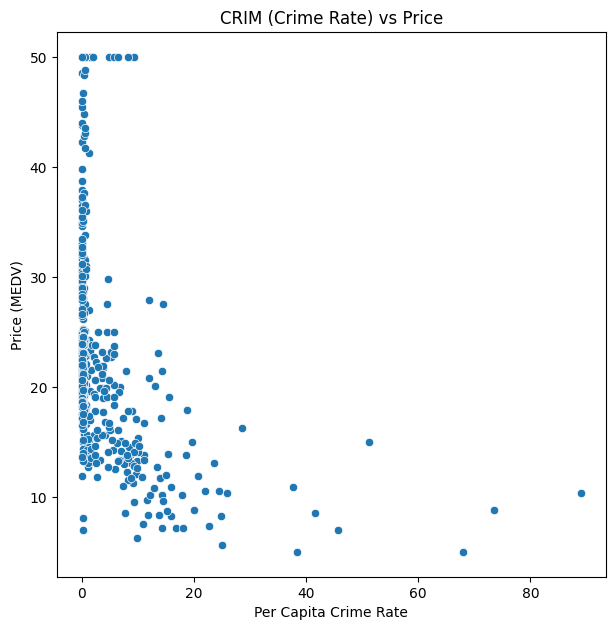

In [195]:
# CRIM vs MEDV
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 6)
sns.scatterplot(x=df['crim'], y=df['medv'])
plt.title('CRIM (Crime Rate) vs Price')
plt.xlabel('Per Capita Crime Rate')
plt.ylabel('Price (MEDV)')

plt.tight_layout()
plt.show()

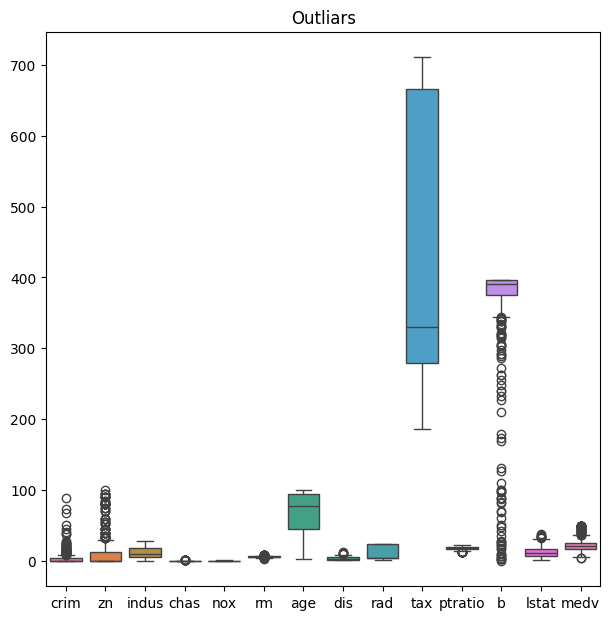

In [196]:
# findig outliar
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 6)
sns.boxplot(df)
plt.title('Outliars')
plt.tight_layout()
plt.show()

Prepare data for Modeling


In [197]:
df['rm'].head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: rm, dtype: float64

In [198]:
# RM has 5 NAN values 

df['rm'].isnull().sum()


5

In [199]:
df['rm'].describe()

count    501.000000
mean       6.284341
std        0.705587
min        3.561000
25%        5.884000
50%        6.208000
75%        6.625000
max        8.780000
Name: rm, dtype: float64

In [200]:
# before filling the missing valuess
print("Before filling missing values: ",df['rm'].isnull().sum())

mean_of_rm = df['rm'].mean() # mean of RM column

df['rm'] = df['rm'].fillna(df['rm'].mean()) # fill mean to missig values like NAN values

# after filling the missing valuess
print("After filling missing values: ",df['rm'].isnull().sum())


Before filling missing values:  5
After filling missing values:  0


In [201]:
# dependent independent variable
X = df.drop('medv', axis=1)
y = df['medv']

In [202]:
# normalize values by scaling
# scaler = MinMaxScaler()
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)


In [203]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 404
Test set size: 102


LinearRegression

In [205]:
# initialize model
lin_reg = LinearRegression()

CROSS VAL SCORE

In [206]:
crvs = cross_val_score(lin_reg, X, y, cv=5)
print("Cross Vallue Score: ", crvs)

print("Maximum of Cross Value Score: ", crvs.max())

Cross Vallue Score:  [ 0.63136477  0.71361192  0.58438659  0.080268   -0.25430265]
Maximum of Cross Value Score:  0.7136119172521246


MODEL TRAINING

In [207]:
# model fitting
lin_reg.fit(X_train,y_train)

LinearRegression()

MODEL EVALUATION

In [208]:
y_pred = lin_reg.predict(X_test)
y_pred

array([28.98141872, 36.01423173, 14.82430919, 25.0229357 , 18.77077366,
       23.25088901, 17.65921355, 14.3312157 , 23.01799598, 20.61923725,
       24.91477542, 18.65745019, -6.08024872, 21.75669434, 19.23608436,
       26.18483638, 20.65521785,  5.80089206, 40.48814091, 17.61519761,
       27.23332555, 30.05317191, 11.3328674 , 24.1383693 , 17.86296594,
       15.84437533, 22.77843276, 14.57521147, 22.4366747 , 19.18599316,
       22.42492941, 25.20638527, 25.92633141, 17.7144719 , 16.77105313,
       16.96804968, 31.22105015, 20.12198187, 23.76217047, 24.62043216,
       13.93268126, 32.23349827, 42.65936186, 17.32784863, 27.25487922,
       16.99795581, 14.06061007, 25.89028965, 20.29789589, 29.94485087,
       21.30603148, 34.33630976, 16.03389489, 26.20109252, 39.52390271,
       22.58297123, 18.84703823, 32.71222177, 25.05158461, 12.90043059,
       20.56663412, 30.48440628, 31.50592444, 15.8863132 , 20.23931509,
       16.71637229, 20.52048882, 25.95211452, 30.60472918, 11.60

In [209]:
li_reg_train_score = lin_reg.score(X_train,y_train)
li_reg_test_score = lin_reg.score(X_test,y_test)

In [210]:
print("Trainig accuracy", li_reg_train_score )
print("Testing accuracy",li_reg_test_score )

Trainig accuracy 0.7503680174420175
Testing accuracy 0.6672089705941878


mean_squared_error

In [211]:
mean_sqr_er = mean_squared_error(y_true=y_test, y_pred=y_pred)
mean_sqr_er

24.40482518814649

mean_absolute_error

In [212]:
mean_abst_er = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mean_abst_er

3.2064039639003847